In [1]:
import wrds
import pandas as pd


db = wrds.Connection(wrds_username='u13393847')

tickers = ['AA', 'FCX', 'NEM', 'CRS', 'RGLD', 'UEC', 'MP', 'STLD', 'CMC', 'RS', 'ATI']
items = ['at', 'ceq', 'ni', 'sale', 'mkvalt', 'epspi', 'act', 'che', 'rect', 'invt',"cogs","dvc"]

data = db.raw_sql(f"select gvkey, datadate, fyear, tic, {', '.join(items)} from comp.funda where tic in {tuple(tickers)} and fyear >= 2022 and fyear <= 2023")


data = data.set_index(['gvkey', 'datadate'])
data = data.loc[:, ['tic', 'fyear'] + items]
data = data.reset_index().set_index(['tic', 'fyear'])

data['EPS'] = data['epspi']
data['MKTCAP'] = data['mkvalt']
data['PE'] = data['MKTCAP'] / data['EPS']


db.close()


Loading library list...
Done


In [2]:
data = data.reset_index().set_index(['tic', 'fyear']).sort_index()
data = data[~data.index.duplicated(keep='first')]

In [3]:
data

gvkey    datadate         at        ceq        ni       sale  \
tic  fyear                                                                  
AA   2022   027638  2022-12-31  14756.000   5076.000  -123.000  12451.000   
     2023   027638  2023-12-31  14155.000   4251.000  -651.000  10551.000   
ATI  2022   010405  2022-12-31   4445.600   1045.900   130.900   3836.000   
     2023   010405  2023-12-31   4985.100   1373.000   410.800   4173.700   
CMC  2022   003246  2022-08-31   6237.027   3286.197  1217.262   8913.481   
     2023   003246  2023-08-31   6639.094   4120.873   859.760   8799.533   
CRS  2022   002787  2022-06-30   2932.300   1330.500   -49.100   1836.300   
     2023   002787  2023-06-30   3053.900   1396.100    56.400   2550.300   
FCX  2022   014590  2022-12-31  51093.000  15555.000  3468.000  22798.000   
     2023   014590  2023-12-31  52506.000  16693.000  1848.000  22855.000   
MP   2022   037407  2022-12-31   2237.787   1312.634   289.004    527.510   
     2023   037407  2023-12-31   2336.452   1365.779    24.307    253.445   
NEM  2022   007881  2022-12-31  38482.000  19354.000  -429.000  11915.000   
     2023   007881  2023-12-31  55506.000  29027.000 -2494.000  11812.000   
RGLD 2022   009273  2022-12-31   3534.522   2741.093   238.982    603.206   
     2023   009273  2023-12-31   3361.057   2888.217   239.440    608.157   
RS   2022   030671  2022-12-31  10329.900   7087.400  1840.100  17025.000   
     2023   030671  2023-12-31  10480.300   7722.300  1335.900  14805.900   
STLD 2022   064030  2022-12-31  14159.984   8130.357  3862.674  22260.774   
     2023   064030  2023-12-31  14908.420   8866.666  2450.882  18795.316   
UEC  2022   165798  2022-07-31    354.247    326.909     5.252     23.161   
     2023   165798  2023-07-31    737.589    631.827    -3.307    164.389   

                mkvalt  epspi        act       che      rect      invt  \
tic  fyear                                                               
AA   2022    8046.7804  -0.68   5250.000  1418.000   909.000  2427.000   
     2023    6068.0480  -3.65   4405.000   976.000   808.000  2158.000   
ATI  2022    3830.2318   1.03   2476.400   584.000   643.700  1195.700   
     2023    5769.1881   3.21   2737.700   743.900   684.600  1247.500   
CMC  2022    4759.7630  10.09   3441.468   672.596  1358.907  1169.696   
     2023    6558.6294   7.34   3144.155   592.332  1240.217  1035.582   
CRS  2022    1347.6623  -1.01   1119.400   154.200   382.300   496.100   
     2023    2729.9387   1.15   1281.900    44.500   531.300   639.700   
FCX  2022   54340.0000   2.40  15613.000  8257.000  1795.000  5180.000   
     2023   61087.9500   1.28  14065.000  5966.000  1664.000  6060.000   
MP   2022    4314.7260   1.64   1293.828  1188.632    35.057    57.554   
     2023    3534.9277   0.14   1131.177   999.134    30.231    95.182   
NEM  2022   37429.6000  -0.54   6515.000  3758.000   366.000  1753.000   
     2023   47681.2800  -2.97   7512.000  3036.000  1227.000  2642.000   
RGLD 2022    7393.6430   3.64    185.833   118.586    52.471    12.656   
     2023    7938.8467   3.64    167.426   104.167    51.560     9.788   
RS   2022   11900.8403  30.39   4886.600  1173.400  1602.300  1995.300   
     2023   16017.5533  22.90   4771.800  1080.200  1508.000  2043.200   
STLD 2022   16895.8472  21.06   7638.018  2256.632  2056.051  3129.964   
     2023   18898.1258  14.72   6787.826  2122.097  1608.307  2894.632   
UEC  2022    1216.4796   0.02    102.191    32.536     0.000    66.570   
     2023    1362.4308  -0.01     55.205    45.614     0.000     6.207   

                 cogs       dvc    EPS      MKTCAP             PE  
tic  fyear                                                         
AA   2022   10212.000    72.000  -0.68   8046.7804  -11833.500588  
     2023    9764.000    72.000  -3.65   6068.0480   -1662.478904  
ATI  2022    2970.900     0.000   1.03   3830.2318    3718.671650  
     2023    3223.100     0.000   3.21   5769.1

In [4]:
#  Return on Assets (ROA)
data['ROA'] = data['ni'] / data['at']

#  Return on Equity (ROE)
data['ROE'] = data['ni'] / data['ceq']

#  Profit Margin
data['ProfitMargin'] = data['ni'] / data['sale']

#  Asset Turnover
data['AssetTurnover'] = data['sale'] / data['at']

#  Earnings per Share (EPS)
data['EPS'] = data['epspi']

# P/E Ratio
data['PERatio'] = data['mkvalt'] / data['epspi']

#  Payout Ratio
data['payout_ratio'] = data['dvc'] / data['ni']

#  Current Ratio
data['CurrentRatio'] = data['act'] / (data['at'] - data['che'])

#  Acid Test Ratio
data['AcidTestRatio'] = (data['act'] - data['invt']) / (data['at'] - data['che'])

#  Accounts Receivable Turnover
data['ARTurnover'] = data['sale'] / data['rect']

#  Inventory Turnover
data['InvTurnover'] = data['cogs'] / data['invt']

In [15]:
data

gvkey    datadate         at        ceq        ni       sale  \
tic  fyear                                                                  
AA   2022   027638  2022-12-31  14756.000   5076.000  -123.000  12451.000   
     2023   027638  2023-12-31  14155.000   4251.000  -651.000  10551.000   
ATI  2022   010405  2022-12-31   4445.600   1045.900   130.900   3836.000   
     2023   010405  2023-12-31   4985.100   1373.000   410.800   4173.700   
CMC  2022   003246  2022-08-31   6237.027   3286.197  1217.262   8913.481   
     2023   003246  2023-08-31   6639.094   4120.873   859.760   8799.533   
CRS  2022   002787  2022-06-30   2932.300   1330.500   -49.100   1836.300   
     2023   002787  2023-06-30   3053.900   1396.100    56.400   2550.300   
FCX  2022   014590  2022-12-31  51093.000  15555.000  3468.000  22798.000   
     2023   014590  2023-12-31  52506.000  16693.000  1848.000  22855.000   
MP   2022   037407  2022-12-31   2237.787   1312.634   289.004    527.510   
     2023   037407  2023-12-31   2336.452   1365.779    24.307    253.445   
NEM  2022   007881  2022-12-31  38482.000  19354.000  -429.000  11915.000   
     2023   007881  2023-12-31  55506.000  29027.000 -2494.000  11812.000   
RGLD 2022   009273  2022-12-31   3534.522   2741.093   238.982    603.206   
     2023   009273  2023-12-31   3361.057   2888.217   239.440    608.157   
RS   2022   030671  2022-12-31  10329.900   7087.400  1840.100  17025.000   
     2023   030671  2023-12-31  10480.300   7722.300  1335.900  14805.900   
STLD 2022   064030  2022-12-31  14159.984   8130.357  3862.674  22260.774   
     2023   064030  2023-12-31  14908.420   8866.666  2450.882  18795.316   
UEC  2022   165798  2022-07-31    354.247    326.909     5.252     23.161   
     2023   165798  2023-07-31    737.589    631.827    -3.307    164.389   

                mkvalt  epspi        act       che  ...       ROA       ROE  \
tic  fyear                                          ...                       
AA   2022    8046.7804  -0.68   5250.000  1418.000  ... -0.008336 -0.024232   
     2023    6068.0480  -3.65   4405.000   976.000  ... -0.045991 -0.153140   
ATI  2022    3830.2318   1.03   2476.400   584.000  ...  0.029445  0.125155   
     2023    5769.1881   3.21   2737.700   743.900  ...  0.082406  0.299199   
CMC  2022    4759.7630  10.09   3441.468   672.596  ...  0.195167  0.370417   
     2023    6558.6294   7.34   3144.155   592.332  ...  0.129500  0.208635   
CRS  2022    1347.6623  -1.01   1119.400   154.200  ... -0.016745 -0.036903   
     2023    2729.9387   1.15   1281.900    44.500  ...  0.018468  0.040398   
FCX  2022   54340.0000   2.40  15613.000  8257.000  ...  0.067876  0.222951   
     2023   61087.9500   1.28  14065.000  5966.000  ...  0.035196  0.110705   
MP   2022    4314.7260   1.64   1293.828  1188.632  ...  0.129147  0.220171   
     2023    3534.9277   0.14   1131.177   999.134  ...  0.010403  0.017797   
NEM  2022   37429.6000  -0.54   6515.000  3758.000  ... -0.011148 -0.022166   
     2023   47681.2800  -2.97   7512.000  3036.000  ... -0.044932 -0.085920   
RGLD 2022    7393.6430   3.64    185.833   118.586  ...  0.067614  0.087185   
     2023    7938.8467   3.64    167.426   104.167  ...  0.071239  0.082902   
RS   2022   11900.8403  30.39   4886.600  1173.400  ...  0.178133  0.259630   
     2023   16017.5533  22.90   4771.800  1080.200  ...  0.127468  0.172993   
STLD 2022   16895.8472  21.06   7638.018  2256.632  ...  0.272788  0.475093   
     2023   18898.1258  14.72   6787.826  2122.097  ...  0.164396  0.276415   
UEC  2022    1216.4796   0.02    102.191    32.536  ...  0.014826  0.016066   
     2023    1362.4308  -0.01     55.205    45.614  ... -0.004484 -0.005234   

            ProfitMargin  AssetTurnover        PERatio  payout_ratio  \
tic  fyear                                                             
AA   2022      -0.009879       0.843792  -11833.500588     -0.585366   
     2023      -0.061700       0.745390   -1662.478

In [5]:
data

gvkey    datadate         at        ceq        ni       sale  \
tic  fyear                                                                  
AA   2022   027638  2022-12-31  14756.000   5076.000  -123.000  12451.000   
     2023   027638  2023-12-31  14155.000   4251.000  -651.000  10551.000   
ATI  2022   010405  2022-12-31   4445.600   1045.900   130.900   3836.000   
     2023   010405  2023-12-31   4985.100   1373.000   410.800   4173.700   
CMC  2022   003246  2022-08-31   6237.027   3286.197  1217.262   8913.481   
     2023   003246  2023-08-31   6639.094   4120.873   859.760   8799.533   
CRS  2022   002787  2022-06-30   2932.300   1330.500   -49.100   1836.300   
     2023   002787  2023-06-30   3053.900   1396.100    56.400   2550.300   
FCX  2022   014590  2022-12-31  51093.000  15555.000  3468.000  22798.000   
     2023   014590  2023-12-31  52506.000  16693.000  1848.000  22855.000   
MP   2022   037407  2022-12-31   2237.787   1312.634   289.004    527.510   
     2023   037407  2023-12-31   2336.452   1365.779    24.307    253.445   
NEM  2022   007881  2022-12-31  38482.000  19354.000  -429.000  11915.000   
     2023   007881  2023-12-31  55506.000  29027.000 -2494.000  11812.000   
RGLD 2022   009273  2022-12-31   3534.522   2741.093   238.982    603.206   
     2023   009273  2023-12-31   3361.057   2888.217   239.440    608.157   
RS   2022   030671  2022-12-31  10329.900   7087.400  1840.100  17025.000   
     2023   030671  2023-12-31  10480.300   7722.300  1335.900  14805.900   
STLD 2022   064030  2022-12-31  14159.984   8130.357  3862.674  22260.774   
     2023   064030  2023-12-31  14908.420   8866.666  2450.882  18795.316   
UEC  2022   165798  2022-07-31    354.247    326.909     5.252     23.161   
     2023   165798  2023-07-31    737.589    631.827    -3.307    164.389   

                mkvalt  epspi        act       che  ...       ROA       ROE  \
tic  fyear                                          ...                       
AA   2022    8046.7804  -0.68   5250.000  1418.000  ... -0.008336 -0.024232   
     2023    6068.0480  -3.65   4405.000   976.000  ... -0.045991 -0.153140   
ATI  2022    3830.2318   1.03   2476.400   584.000  ...  0.029445  0.125155   
     2023    5769.1881   3.21   2737.700   743.900  ...  0.082406  0.299199   
CMC  2022    4759.7630  10.09   3441.468   672.596  ...  0.195167  0.370417   
     2023    6558.6294   7.34   3144.155   592.332  ...  0.129500  0.208635   
CRS  2022    1347.6623  -1.01   1119.400   154.200  ... -0.016745 -0.036903   
     2023    2729.9387   1.15   1281.900    44.500  ...  0.018468  0.040398   
FCX  2022   54340.0000   2.40  15613.000  8257.000  ...  0.067876  0.222951   
     2023   61087.9500   1.28  14065.000  5966.000  ...  0.035196  0.110705   
MP   2022    4314.7260   1.64   1293.828  1188.632  ...  0.129147  0.220171   
     2023    3534.9277   0.14   1131.177   999.134  ...  0.010403  0.017797   
NEM  2022   37429.6000  -0.54   6515.000  3758.000  ... -0.011148 -0.022166   
     2023   47681.2800  -2.97   7512.000  3036.000  ... -0.044932 -0.085920   
RGLD 2022    7393.6430   3.64    185.833   118.586  ...  0.067614  0.087185   
     2023    7938.8467   3.64    167.426   104.167  ...  0.071239  0.082902   
RS   2022   11900.8403  30.39   4886.600  1173.400  ...  0.178133  0.259630   
     2023   16017.5533  22.90   4771.800  1080.200  ...  0.127468  0.172993   
STLD 2022   16895.8472  21.06   7638.018  2256.632  ...  0.272788  0.475093   
     2023   18898.1258  14.72   6787.826  2122.097  ...  0.164396  0.276415   
UEC  2022    1216.4796   0.02    102.191    32.536  ...  0.014826  0.016066   
     2023    1362.4308  -0.01     55.205    45.614  ... -0.004484 -0.005234   

            ProfitMargin  AssetTurnover        PERatio  payout_ratio  \
tic  fyear                                                             
AA   2022      -0.009879       0.843792  -11833.500588     -0.585366   
     2023      -0.061700       0.745390   -1662.478

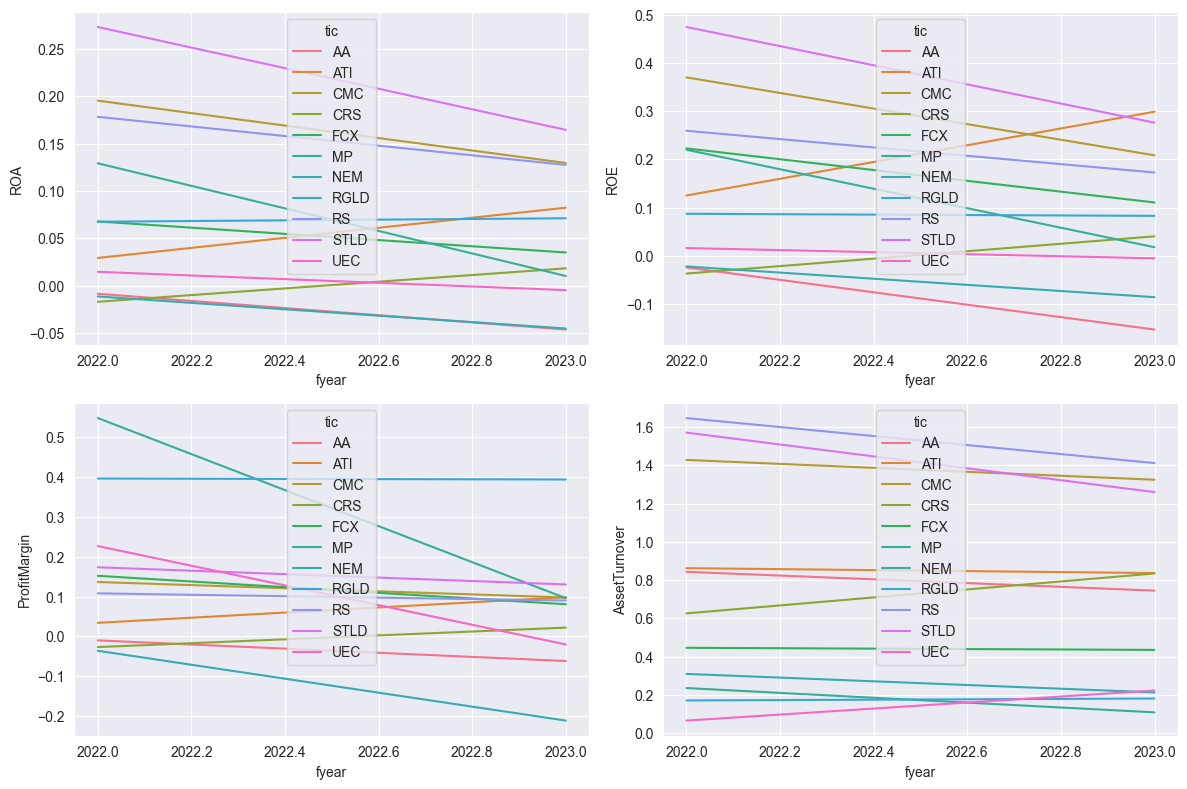

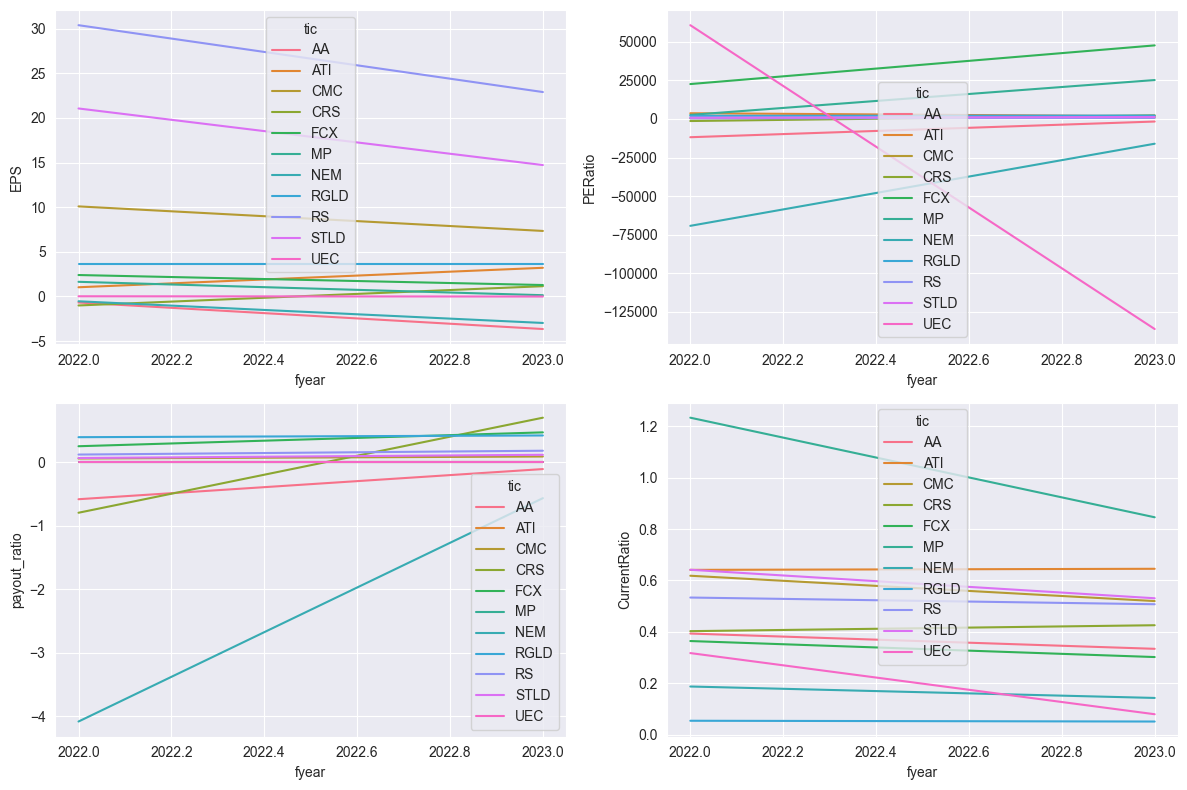

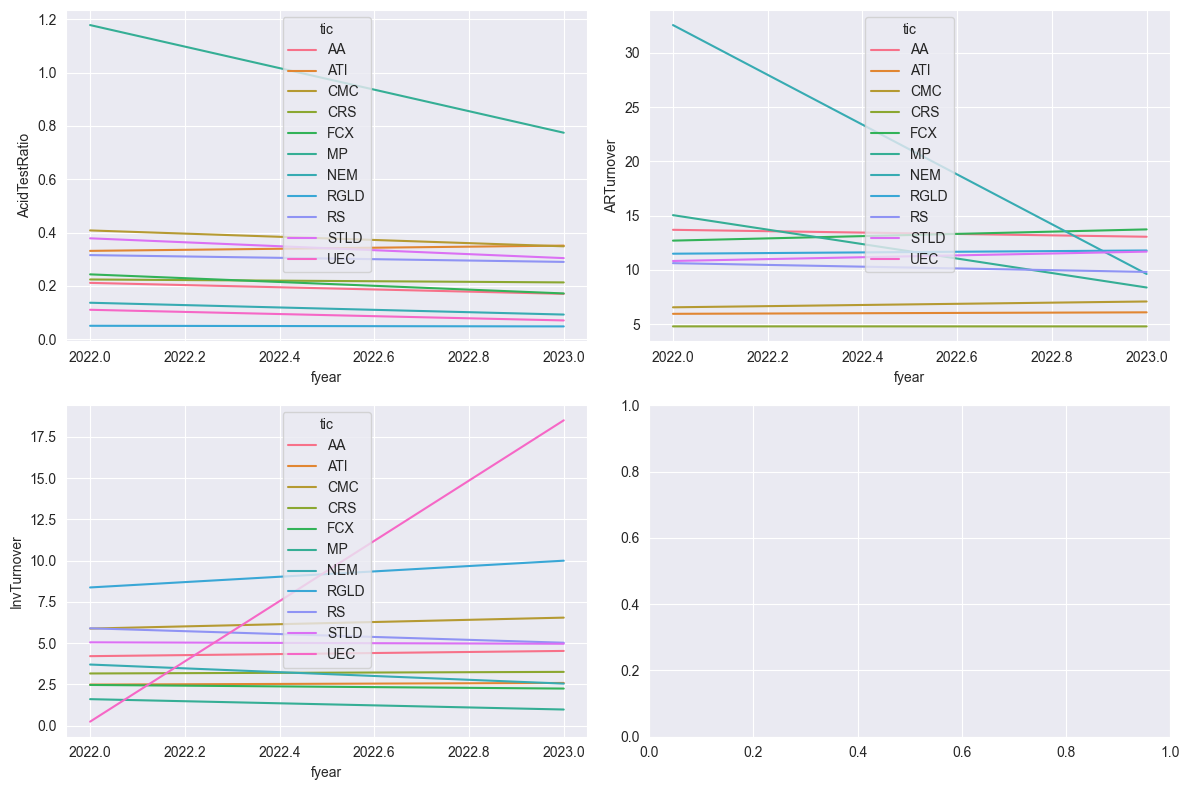

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

data_grouped = data

# ROA、ROE、PM、ATO
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.lineplot(ax=axes[0, 0], data=data_grouped, x='fyear', y='ROA', hue='tic')
sns.lineplot(ax=axes[0, 1], data=data_grouped, x='fyear', y='ROE', hue='tic')
sns.lineplot(ax=axes[1, 0], data=data_grouped, x='fyear', y='ProfitMargin', hue='tic')
sns.lineplot(ax=axes[1, 1], data=data_grouped, x='fyear', y='AssetTurnover', hue='tic')
plt.tight_layout()
plt.show()

# EPS、PE Ratio、PR
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.lineplot(ax=axes[0, 0], data=data_grouped, x='fyear', y='EPS', hue='tic')
sns.lineplot(ax=axes[0, 1], data=data_grouped, x='fyear', y='PERatio', hue='tic')
sns.lineplot(ax=axes[1, 0], data=data_grouped, x='fyear', y='payout_ratio', hue='tic')
sns.lineplot(ax=axes[1, 1], data=data_grouped, x='fyear', y='CurrentRatio', hue='tic')
plt.tight_layout()
plt.show()

# Acid Test Ratio、AR Turnover、Inv Turnover
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.lineplot(ax=axes[0, 0], data=data_grouped, x='fyear', y='AcidTestRatio', hue='tic')
sns.lineplot(ax=axes[0, 1], data=data_grouped, x='fyear', y='ARTurnover', hue='tic')
sns.lineplot(ax=axes[1, 0], data=data_grouped, x='fyear', y='InvTurnover', hue='tic')
plt.tight_layout()
plt.show()


In [23]:
df = data.loc[:, ['ROA', 'ROE', 'ProfitMargin', 'AssetTurnover', 'PERatio', 'payout_ratio', 'CurrentRatio', 'AcidTestRatio', 'ARTurnover', 'InvTurnover','EPS']]


In [24]:
df

ROA       ROE  ProfitMargin  AssetTurnover        PERatio  \
tic  fyear                                                                   
AA   2022  -0.008336 -0.024232     -0.009879       0.843792  -11833.500588   
     2023  -0.045991 -0.153140     -0.061700       0.745390   -1662.478904   
ATI  2022   0.029445  0.125155      0.034124       0.862876    3718.671650   
     2023   0.082406  0.299199      0.098426       0.837235    1797.254860   
CMC  2022   0.195167  0.370417      0.136564       1.429123     471.730723   
     2023   0.129500  0.208635      0.097705       1.325412     893.546240   
CRS  2022  -0.016745 -0.036903     -0.026739       0.626232   -1334.319109   
     2023   0.018468  0.040398      0.022115       0.835096    2373.859739   
FCX  2022   0.067876  0.222951      0.152119       0.446206   22641.666667   
     2023   0.035196  0.110705      0.080858       0.435284   47724.960938   
MP   2022   0.129147  0.220171      0.547864       0.235728    2630.930488   
     2023   0.010403  0.017797      0.095906       0.108474   25249.483571   
NEM  2022  -0.011148 -0.022166     -0.036005       0.309625  -69314.074074   
     2023  -0.044932 -0.085920     -0.211141       0.212806  -16054.303030   
RGLD 2022   0.067614  0.087185      0.396186       0.170661    2031.220604   
     2023   0.071239  0.082902      0.393714       0.180942    2181.001841   
RS   2022   0.178133  0.259630      0.108082       1.648128     391.603827   
     2023   0.127468  0.172993      0.090228       1.412736     699.456476   
STLD 2022   0.272788  0.475093      0.173519       1.572090     802.271947   
     2023   0.164396  0.276415      0.130399       1.260718    1283.840068   
UEC  2022   0.014826  0.016066      0.226761       0.065381   60823.980000   
     2023  -0.004484 -0.005234     -0.020117       0.222873 -136243.080000   

            payout_ratio  CurrentRatio  AcidTestRatio  ARTurnover  \
tic  fyear                                                          
AA   2022      -0.585366      0.393612       0.211651   13.697470   
     2023      -0.110599      0.334244       0.170499   13.058168   
ATI  2022       0.000000      0.641289       0.331650    5.959298   
     2023       0.000000      0.645501       0.351363    6.096553   
CMC  2022       0.055657      0.618476       0.408267    6.559302   
     2023       0.087159      0.519973       0.348711    7.095156   
CRS  2022      -0.798371      0.402937       0.224362    4.803296   
     2023       0.698582      0.425965       0.213398    4.800113   
FCX  2022       0.249135      0.364483       0.243557   12.700836   
     2023       0.467532      0.302213       0.172003   13.734976   
MP   2022       0.000000      1.233210       1.178352   15.047209   
     2023       0.000000      0.845855       0.774681    8.383613   
NEM  2022      -4.086247      0.187622       0.137139   32.554645   
     2023      -0.568565      0.143168       0.092815    9.626732   
RGLD 2022       0.391649      0.054402       0.050697   11.495988   
     2023       0.418610      0.051407       0.048401   11.795132   
RS   2022       0.117983      0.533676       0.315765   10.625351   
     2023       0.178232      0.507633       0.290274    9.818236   
STLD 2022       0.063502      0.641670       0.378721   10.826956   
     2023       0.114449      0.530866       0.304481   11.686398   
UEC  2022       0.000000      0.317648       0.110724         inf   
     2023      -0.000000      0.079779       0.070809         inf   

            InvTurnover    EPS  
tic  fyear                      
AA   2022      4.207664  -0.68  
     2023      4.524560  -3.65  
ATI  2022      2.484653   1.03  
     2023      2.583647   3.21  
CMC  2022      5.879293  10.09  
     2023      6.542396   7.34  
CRS  2022      3.158637  -1.01  
     2023      3.254651   1.15  
FCX  2022      2.462934   2.40  
     2023      2.243729   1.28  
MP   2022      1.602287   1.64  
     2023      0.974071   0.14  
NEM  2022      3.699943  

<Axes: title={'center': '2022 EPS'}, xlabel='tic', ylabel='EPS'>

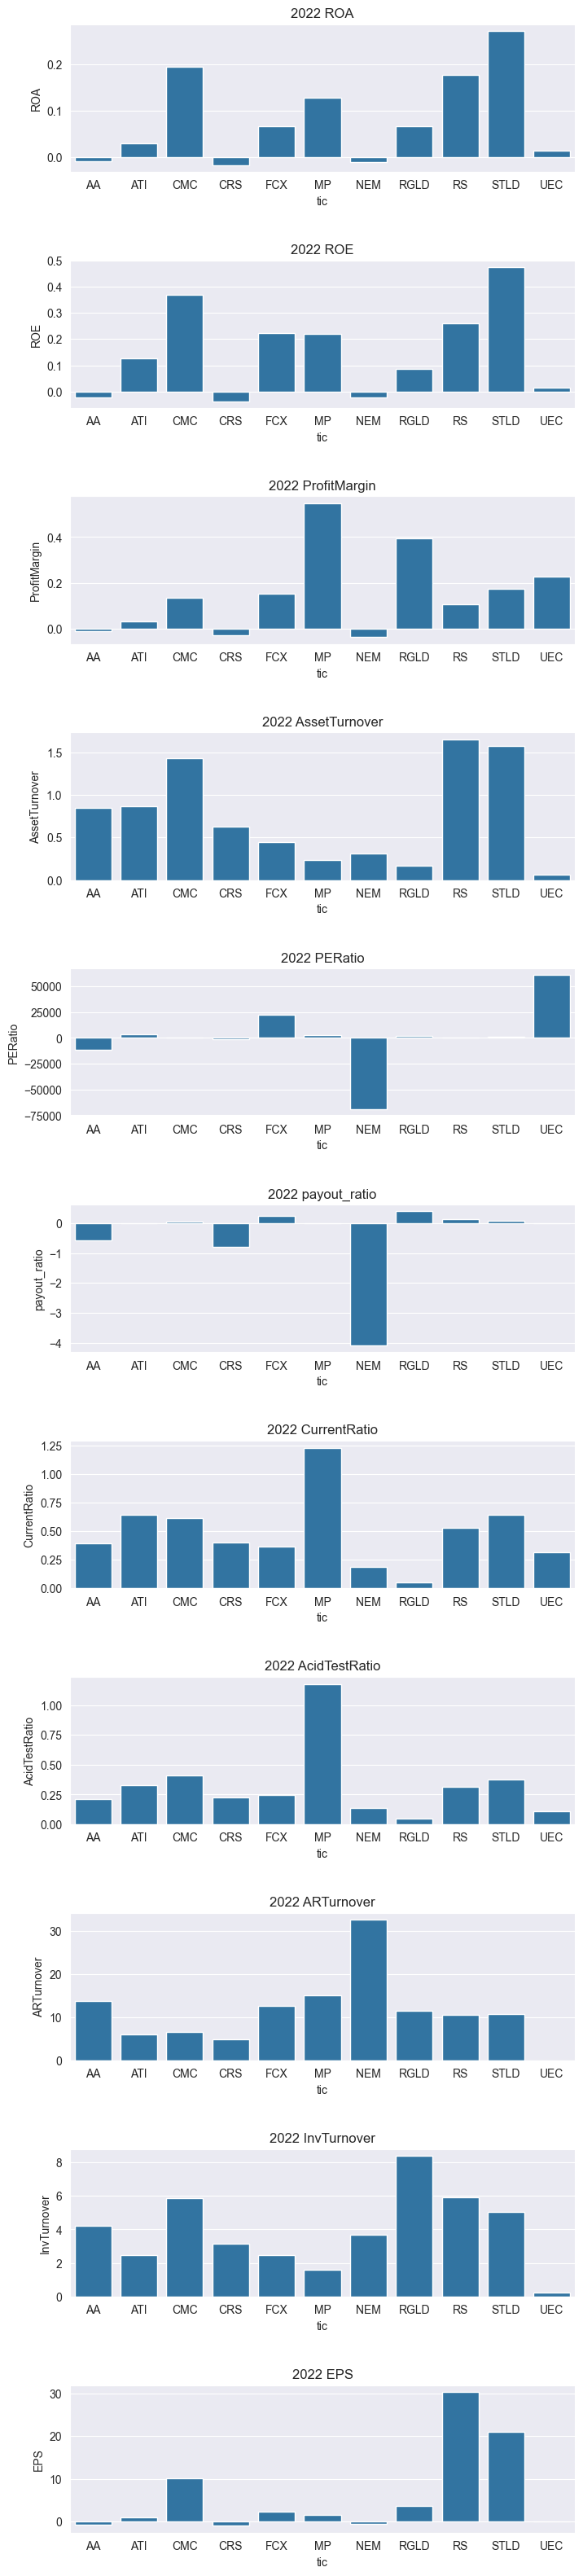

In [25]:
import seaborn as sns

# 2022 comparison
df_2022 = df.xs(2022, level='fyear').groupby('tic').mean()

# ROA、ROE、ProfitMargin、AssetTurnover、PE Ratio、payout_ratio、CurrentRatio、AcidTestRatio、ARTurnover、InvTurnover、PERatio
fig, axs = plt.subplots(nrows=11, figsize=(8, 40))
plt.subplots_adjust(hspace=0.6)
axs[0].set(title='2022 ROA')
sns.barplot(ax=axs[0], data=df_2022, x=df_2022.index, y='ROA')
axs[1].set(title='2022 ROE')
sns.barplot(ax=axs[1], data=df_2022, x=df_2022.index, y='ROE')
axs[2].set(title='2022 ProfitMargin')
sns.barplot(ax=axs[2], data=df_2022, x=df_2022.index, y='ProfitMargin')
axs[3].set(title='2022 AssetTurnover')
sns.barplot(ax=axs[3], data=df_2022, x=df_2022.index, y='AssetTurnover')
axs[4].set(title='2022 PERatio')
sns.barplot(ax=axs[4], data=df_2022, x=df_2022.index, y='PERatio')
axs[5].set(title='2022 payout_ratio')
sns.barplot(ax=axs[5], data=df_2022, x=df_2022.index, y='payout_ratio')
axs[6].set(title='2022 CurrentRatio')
sns.barplot(ax=axs[6], data=df_2022, x=df_2022.index, y='CurrentRatio')
axs[7].set(title='2022 AcidTestRatio')
sns.barplot(ax=axs[7], data=df_2022, x=df_2022.index, y='AcidTestRatio')
axs[8].set(title='2022 ARTurnover')
sns.barplot(ax=axs[8], data=df_2022, x=df_2022.index, y='ARTurnover')
axs[9].set(title='2022 InvTurnover')
sns.barplot(ax=axs[9], data=df_2022, x=df_2022.index, y='InvTurnover')
axs[10].set(title='2022 EPS')
sns.barplot(ax=axs[10], data=df_2022, x=df_2022.index, y='EPS')



<Axes: title={'center': '2023 EPS'}, xlabel='tic', ylabel='EPS'>

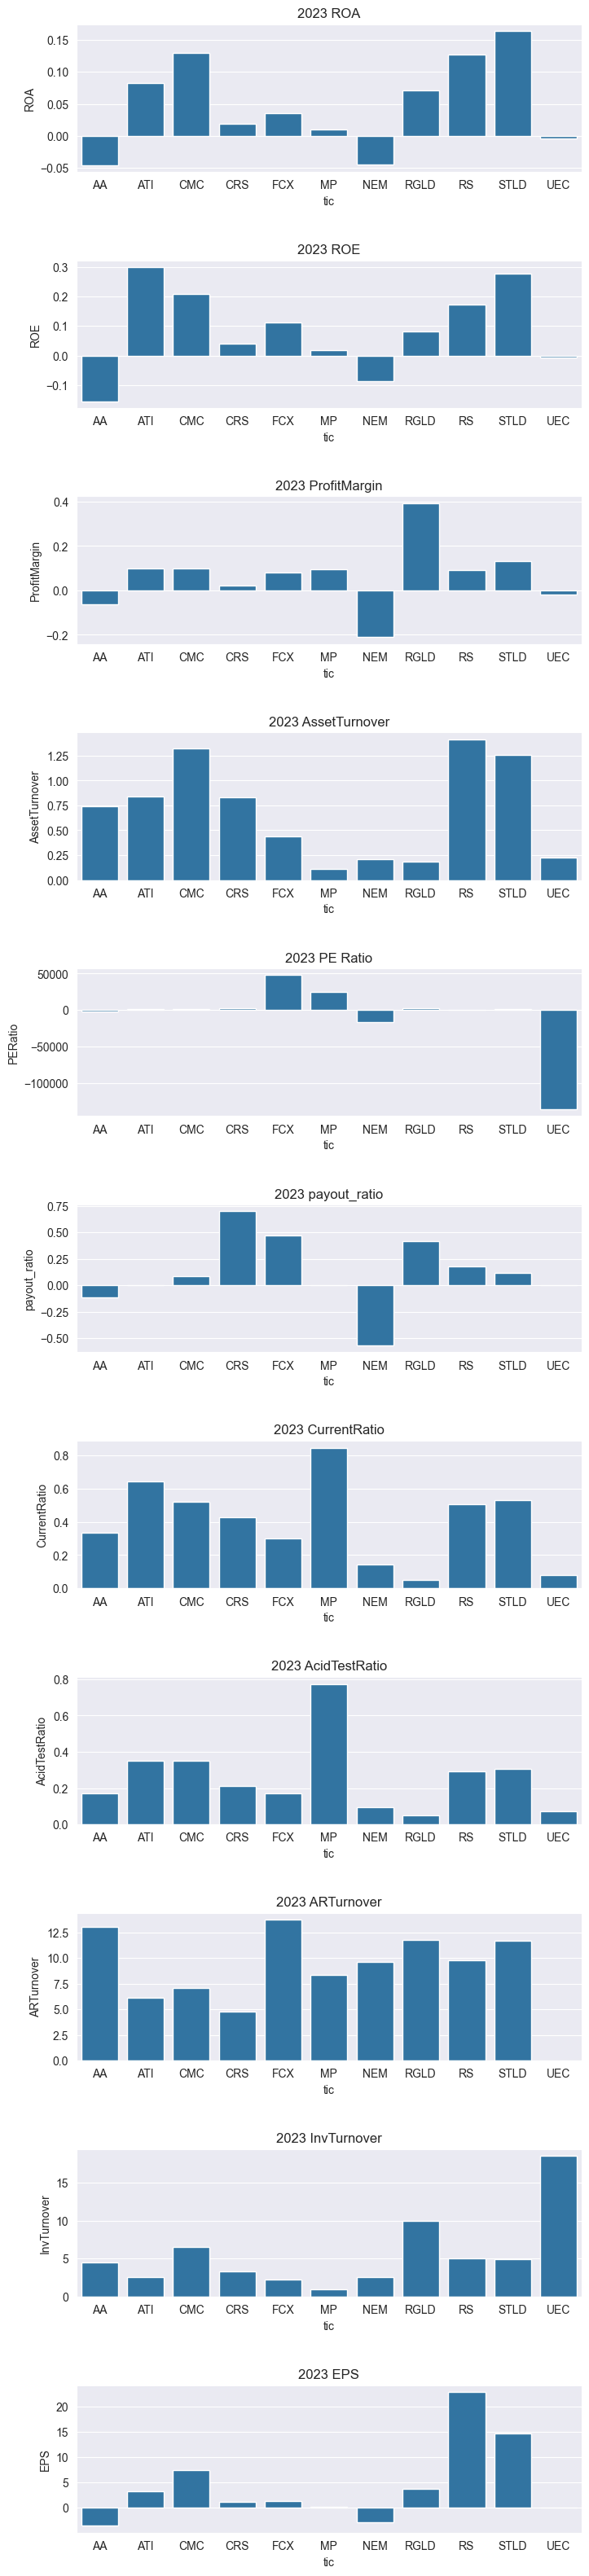

In [26]:
import seaborn as sns

# 2023 comparison
df_2023 = df.xs(2023, level='fyear').groupby('tic').mean()

# ROA、ROE、ProfitMargin、AssetTurnover、PE Ratio、payout_ratio、CurrentRatio、AcidTestRatio、ARTurnover、InvTurnover、PERatio
fig, axs = plt.subplots(nrows=11, figsize=(8, 40))
plt.subplots_adjust(hspace=0.6)
axs[0].set(title='2023 ROA')
sns.barplot(ax=axs[0], data=df_2023, x=df_2023.index, y='ROA')
axs[1].set(title='2023 ROE')
sns.barplot(ax=axs[1], data=df_2023, x=df_2023.index, y='ROE')
axs[2].set(title='2023 ProfitMargin')
sns.barplot(ax=axs[2], data=df_2023, x=df_2023.index, y='ProfitMargin')
axs[3].set(title='2023 AssetTurnover')
sns.barplot(ax=axs[3], data=df_2023, x=df_2023.index, y='AssetTurnover')
axs[4].set(title='2023 PE Ratio')
sns.barplot(ax=axs[4], data=df_2023, x=df_2023.index, y='PERatio')
axs[5].set(title='2023 payout_ratio')
sns.barplot(ax=axs[5], data=df_2023, x=df_2023.index, y='payout_ratio')
axs[6].set(title='2023 CurrentRatio')
sns.barplot(ax=axs[6], data=df_2023, x=df_2023.index, y='CurrentRatio')
axs[7].set(title='2023 AcidTestRatio')
sns.barplot(ax=axs[7], data=df_2023, x=df_2023.index, y='AcidTestRatio')
axs[8].set(title='2023 ARTurnover')
sns.barplot(ax=axs[8], data=df_2023, x=df_2023.index, y='ARTurnover')
axs[9].set(title='2023 InvTurnover')
sns.barplot(ax=axs[9], data=df_2023, x=df_2023.index, y='InvTurnover')
axs[10].set(title='2023 EPS')
sns.barplot(ax=axs[10], data=df_2023, x=df_2023.index, y='EPS')
